# Tu primer árbol de decisión con scikit-learn

In [113]:
#Importamos las librerias principales
import pandas as pd
import matplotlib.pyplot as plt

Utilizaremos el **dataset Titanic** de Standford: https://web.stanford.edu/class/archive/cs/cs109/cs109.1166/problem12.html

In [114]:
#Cargamos dataset a utilizar
titanic = pd.read_csv('titanic.csv', sep = ',')

## Exploración de datos

In [115]:
#Visualizacion del DataFrame
titanic.head(10)

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500
5,0,3,Mr. James Moran,male,27.0,0,0,8.4583
6,0,1,Mr. Timothy J McCarthy,male,54.0,0,0,51.8625
7,0,3,Master. Gosta Leonard Palsson,male,2.0,3,1,21.0750
8,1,3,Mrs. Oscar W (Elisabeth Vilhelmina Berg) Johnson,female,27.0,0,2,11.1333
9,1,2,Mrs. Nicholas (Adele Achem) Nasser,female,14.0,1,0,30.0708


In [116]:
titanic.shape

(887, 8)

In [117]:
#Eliminamos las columnas que no nos interesan
columns_to_drop = ['Name', 'Fare']
titanic.drop(columns_to_drop, axis = 'columns', inplace = True)

In [118]:
#Renombramos las columnas
titanic.columns = ['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch']
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch
0,0,3,male,22.0,1,0
1,1,1,female,38.0,1,0
2,1,3,female,26.0,0,0
3,1,1,female,35.0,1,0
4,0,3,male,35.0,0,0


In [119]:
#Analizamos el shape del objeto
print(titanic.shape)

(887, 6)


In [120]:
#Visualizamos los tipos de datos
titanic.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
dtype: object

In [121]:
#Cambiamos los tipos de datos
#titanic = pd.get_dummies(titanic, columns=['Sex'], drop_first=True)
# otra forma
titanic['Sex'] = titanic['Sex'].apply(lambda x: 1 if x == 'male' else 0)

In [122]:
titanic.dtypes

Survived      int64
Pclass        int64
Sex           int64
Age         float64
SibSp         int64
Parch         int64
dtype: object

In [123]:
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch
0,0,3,1,22.0,1,0
1,1,1,0,38.0,1,0
2,1,3,0,26.0,0,0
3,1,1,0,35.0,1,0
4,0,3,1,35.0,0,0


In [124]:
#Reemplazar el DataFrame
titanic.rename(columns={'Sex_male': 'Sex'}, inplace=True)

In [125]:
#Ordenar columnas por nombres
titanic = titanic[['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch']]
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch
0,0,3,1,22.0,1,0
1,1,1,0,38.0,1,0
2,1,3,0,26.0,0,0
3,1,1,0,35.0,1,0
4,0,3,1,35.0,0,0


## Entrenamiento de árbol de decisión con scikit-learn

In [128]:
#Separamos en X e y
X = titanic.drop('Survived', axis= 1)
y = titanic.Survived

In [ ]:
#Importamos las librerias necesarias para la creacion del modelo
from sklearn.model_selection import train_test_split

#30% para test y 70% para train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state= 00000)

14     0
158    0
762    0
740    1
482    0
      ..
619    1
819    1
64     1
880    0
52     1
Name: Survived, Length: 267, dtype: int64

In [146]:
#Arbol de Decision
from sklearn.tree import DecisionTreeClassifier

#Creacion del modelo
tree = DecisionTreeClassifier(max_depth=2, random_state=00000)

In [147]:
#Entrenamiento
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=0)

## Evaluación del modelo

In [148]:
#Calculo de las predicciones en Train y Test
y_train_pred = tree.predict(X_train)
y_test_pred = tree.predict(X_test)

In [150]:
#Calculo de metricas 
from sklearn.metrics import accuracy_score

#Calculo el accuracy en Train
train_accuracy = accuracy_score(y_train, y_train_pred)

#Calculo el accuracy en Test
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f'El accuracy en train es: {train_accuracy}')
print(f'El accuracy en test es: {test_accuracy}')

El accuracy en train es: 0.8048387096774193
El accuracy en test es: 0.7640449438202247


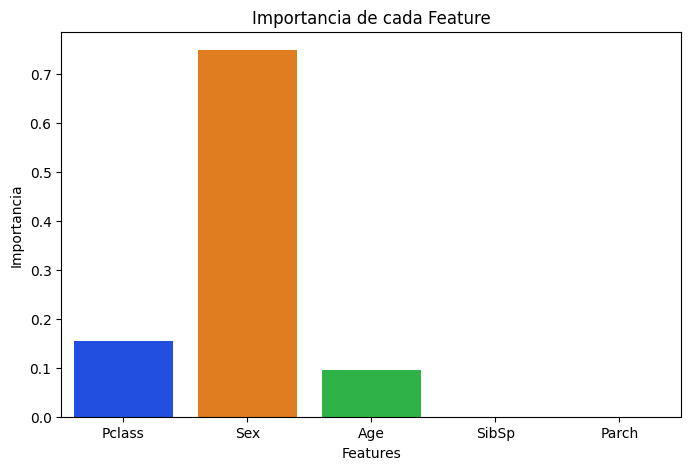

In [151]:
#Verificamos el feature importances
import seaborn as sns

importances = tree.feature_importances_
columns = X.columns
importances_df = pd.DataFrame({'Feature': columns, 'Importance': importances})

# Graficar con sns.barplot
plt.figure(figsize=(8, 5))
sns.barplot(data=importances_df, x='Feature', y='Importance', hue='Feature', palette='bright', legend=False)
plt.title('Importancia de cada Feature')
plt.ylabel('Importancia')
plt.xlabel('Features')
plt.show()

**¿Que podemos llevarnos de este ejemplo?**

Podemos observar que para la clasificación del modelo en base a la variable target: Survived, los features más importantes son: Sex, seguido de Pclass y luego de Age. Tambien es importante destacar que se observa una performance parecida en la métrica de Accuracy para los datos de Train y de Test, lo cual es claramente positivo para nuestro modelo. 

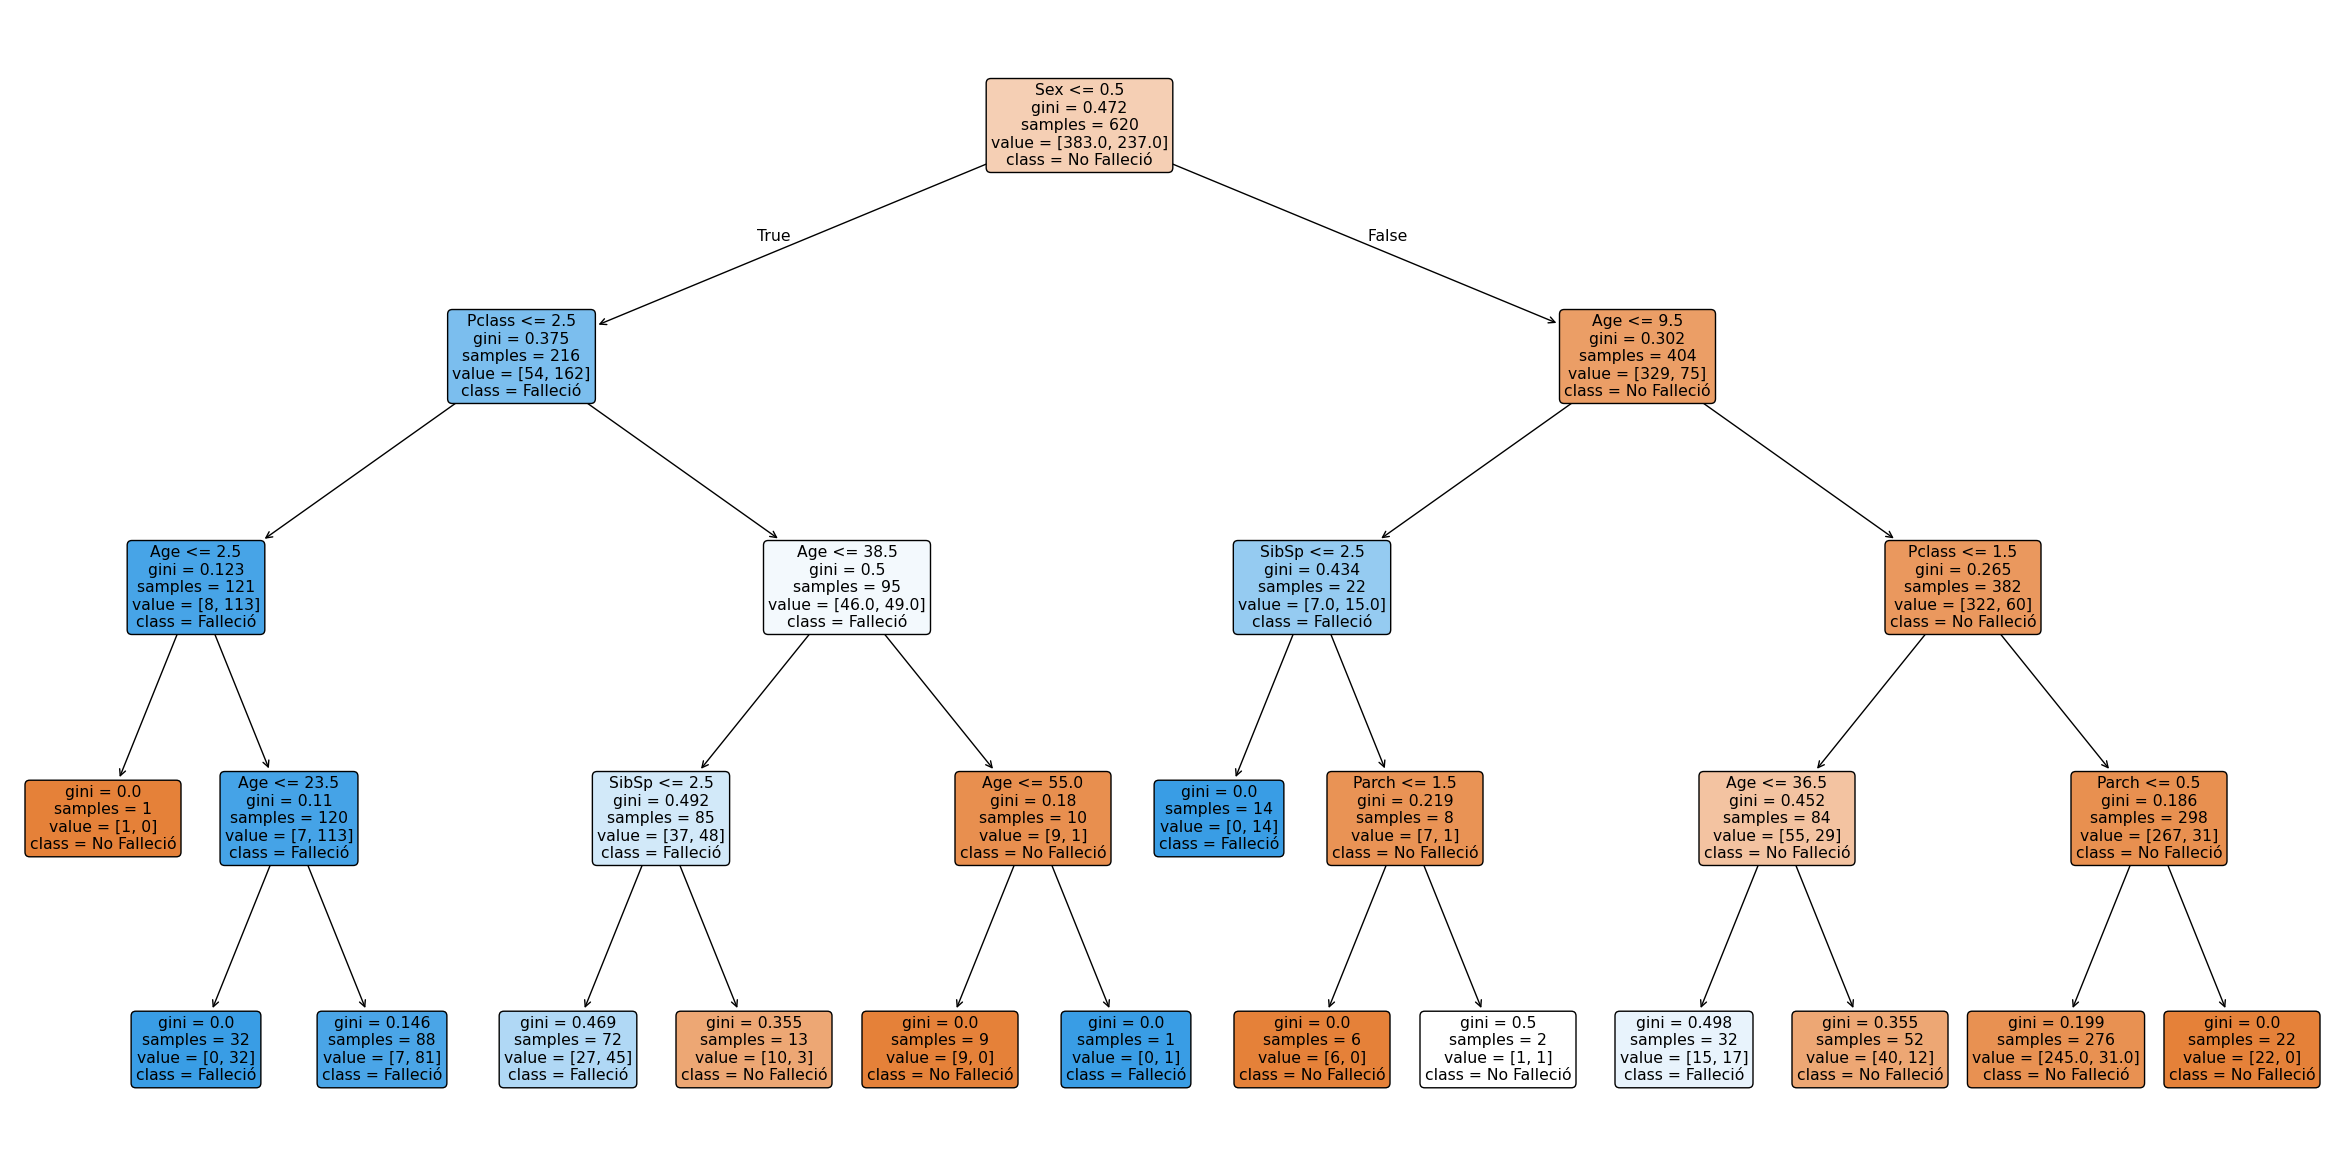

In [152]:
# Árbol con "max_depth" = 5
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

tree = DecisionTreeClassifier(max_depth=4, random_state=00000)

tree.fit(X_train, y_train)

plt.figure(figsize=(30, 15))  # Tamaño de la figura
plot_tree(tree,
          feature_names=X_train.columns, # Para que contenga los nombres de las características
          class_names = ['No Falleció', 'Falleció'], # Para que contenga los nombres de las categorías (en orden numérico ascendente)
          filled=True,  # Colorear las hojas con la categoría mayoritaria
          rounded=True, # Bordes redondeados
          );